# 1. Data Visualization
In this project, we will visualize the ultrasound data by the heatmap, grayscale image and color image respectively. 

## 1.1 Reading data
In this seciton, the raw sonar data will be read from the csv file. The distance between the robot and the obstacle in the x and y directions of the robot coordinate system will be saved in the numpy array X and Y, respectively. Then the Euclid distance will be computed and saved in D based on X and  Y.
- The front sonar is [0~7] clockwise left to right and the rear sonar is [8~15] clockwise right to left

In [1]:
import csv
import numpy as np

csv_file = "/media/ubuntu16/Documents/datasets/Sonar/SIM/Track-I-II/2019-07-03-1.csv"

distance = []
angular  = []

with open(csv_file, 'r') as f:
    f_reader = csv.reader(f)
    for line in f_reader:
        distance.append([float(line[i]) for i in range(16)])
        angular.append(float(line[17]))
    
print("Reading {} samples from {}".format(len(distance), csv_file))
print("distance array: max: {}, min: {}, mean:{}".format(np.max(distance),
                                                         np.min(distance),
                                                         np.mean(distance)))
print("angular  array: max: {}, min: {}, mean:{}".format(np.max(angular),
                                                         np.min(angular),
                                                         np.mean(angular)))

Reading 45422 samples from /media/ubuntu16/Documents/datasets/Sonar/SIM/Track-I-II/2019-07-03-1.csv
distance array: max: 5.255844485229792, min: 0.37834508893951424, mean:2.367501423936898
angular  array: max: 0.5, min: -0.5, mean:-0.005252384774086412


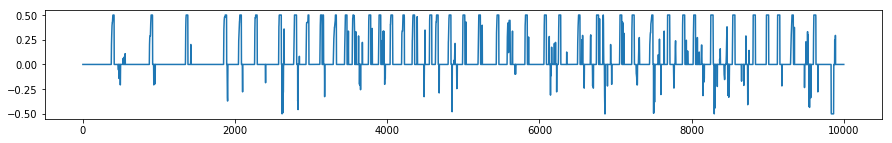

In [170]:
from PIL import Image 
from matplotlib import pyplot as plt
%matplotlib inline 

plt.figure(figsize=(15,2))
plt.plot(np.arange(10000),angular[0:10000])

## 1.2 2-D Data visualization
- Straight 0~374
- Turn left: 375~411
- Trun Right: 10331-10366

In [ ]:
""" 自定义RGB图像显示
    - 数据现在在R通道上

"""
from PIL import Image 
from matplotlib import pyplot as plt
%matplotlib inline 

straight = np.reshape(np.transpose(np.uint8(np.array(distance[0:100])*(255/5.3))), (16,100,1))
left_turn = np.reshape(np.transpose(np.uint8(np.array(distance[340:440])*(255/5.3))), (16,100,1))
right_turn = np.reshape(np.transpose(np.uint8(np.array(distance[10300:10400])*(255/5.3))), (16,100,1))

w_s = np.array(angular[0:100])
w_l = np.array(angular[340:440])
w_r = np.array(angular[10300:10400])

time = np.arange(0,100,1)

g_channel = np.reshape(np.ones((16,100), dtype=np.uint8)*0, (16,100,1))
b_channel = np.reshape(np.ones((16,100), dtype=np.uint8)*0, (16,100,1))

straight_img = np.concatenate((straight, g_channel,b_channel), axis=2)
left_turn_img = np.concatenate((left_turn, g_channel,b_channel), axis=2)
right_turn_img = np.concatenate((right_turn, g_channel,b_channel), axis=2)

fig1, (ax11, ax12, ax13) = plt.subplots(3, 1,figsize=(10,6),sharex=True) # w,h
ax11.imshow(straight_img)
ax11.set_ylabel("Sensor index")
ax11.set_title("Go Straight")

ax12.imshow(left_turn_img)
ax12.set_ylabel("Sensor index")
ax12.set_title("Turn left")

ax13.imshow(right_turn_img)
ax13.set_ylabel("Sensor index")
ax13.set_xlabel("Time")
ax13.set_title("Turn right")

fig2, ax = plt.subplots(figsize=(10,2))
ax.plot(time,w_s)
ax.plot(time,w_l)
ax.plot(time,w_r)
ax.set_xlabel("Time")
ax.set_ylabel("Angular Velocity")
ax.legend(["Go straight", "Turn left", "Turn right"], loc = 2, prop = {'size':8})

plt.show()

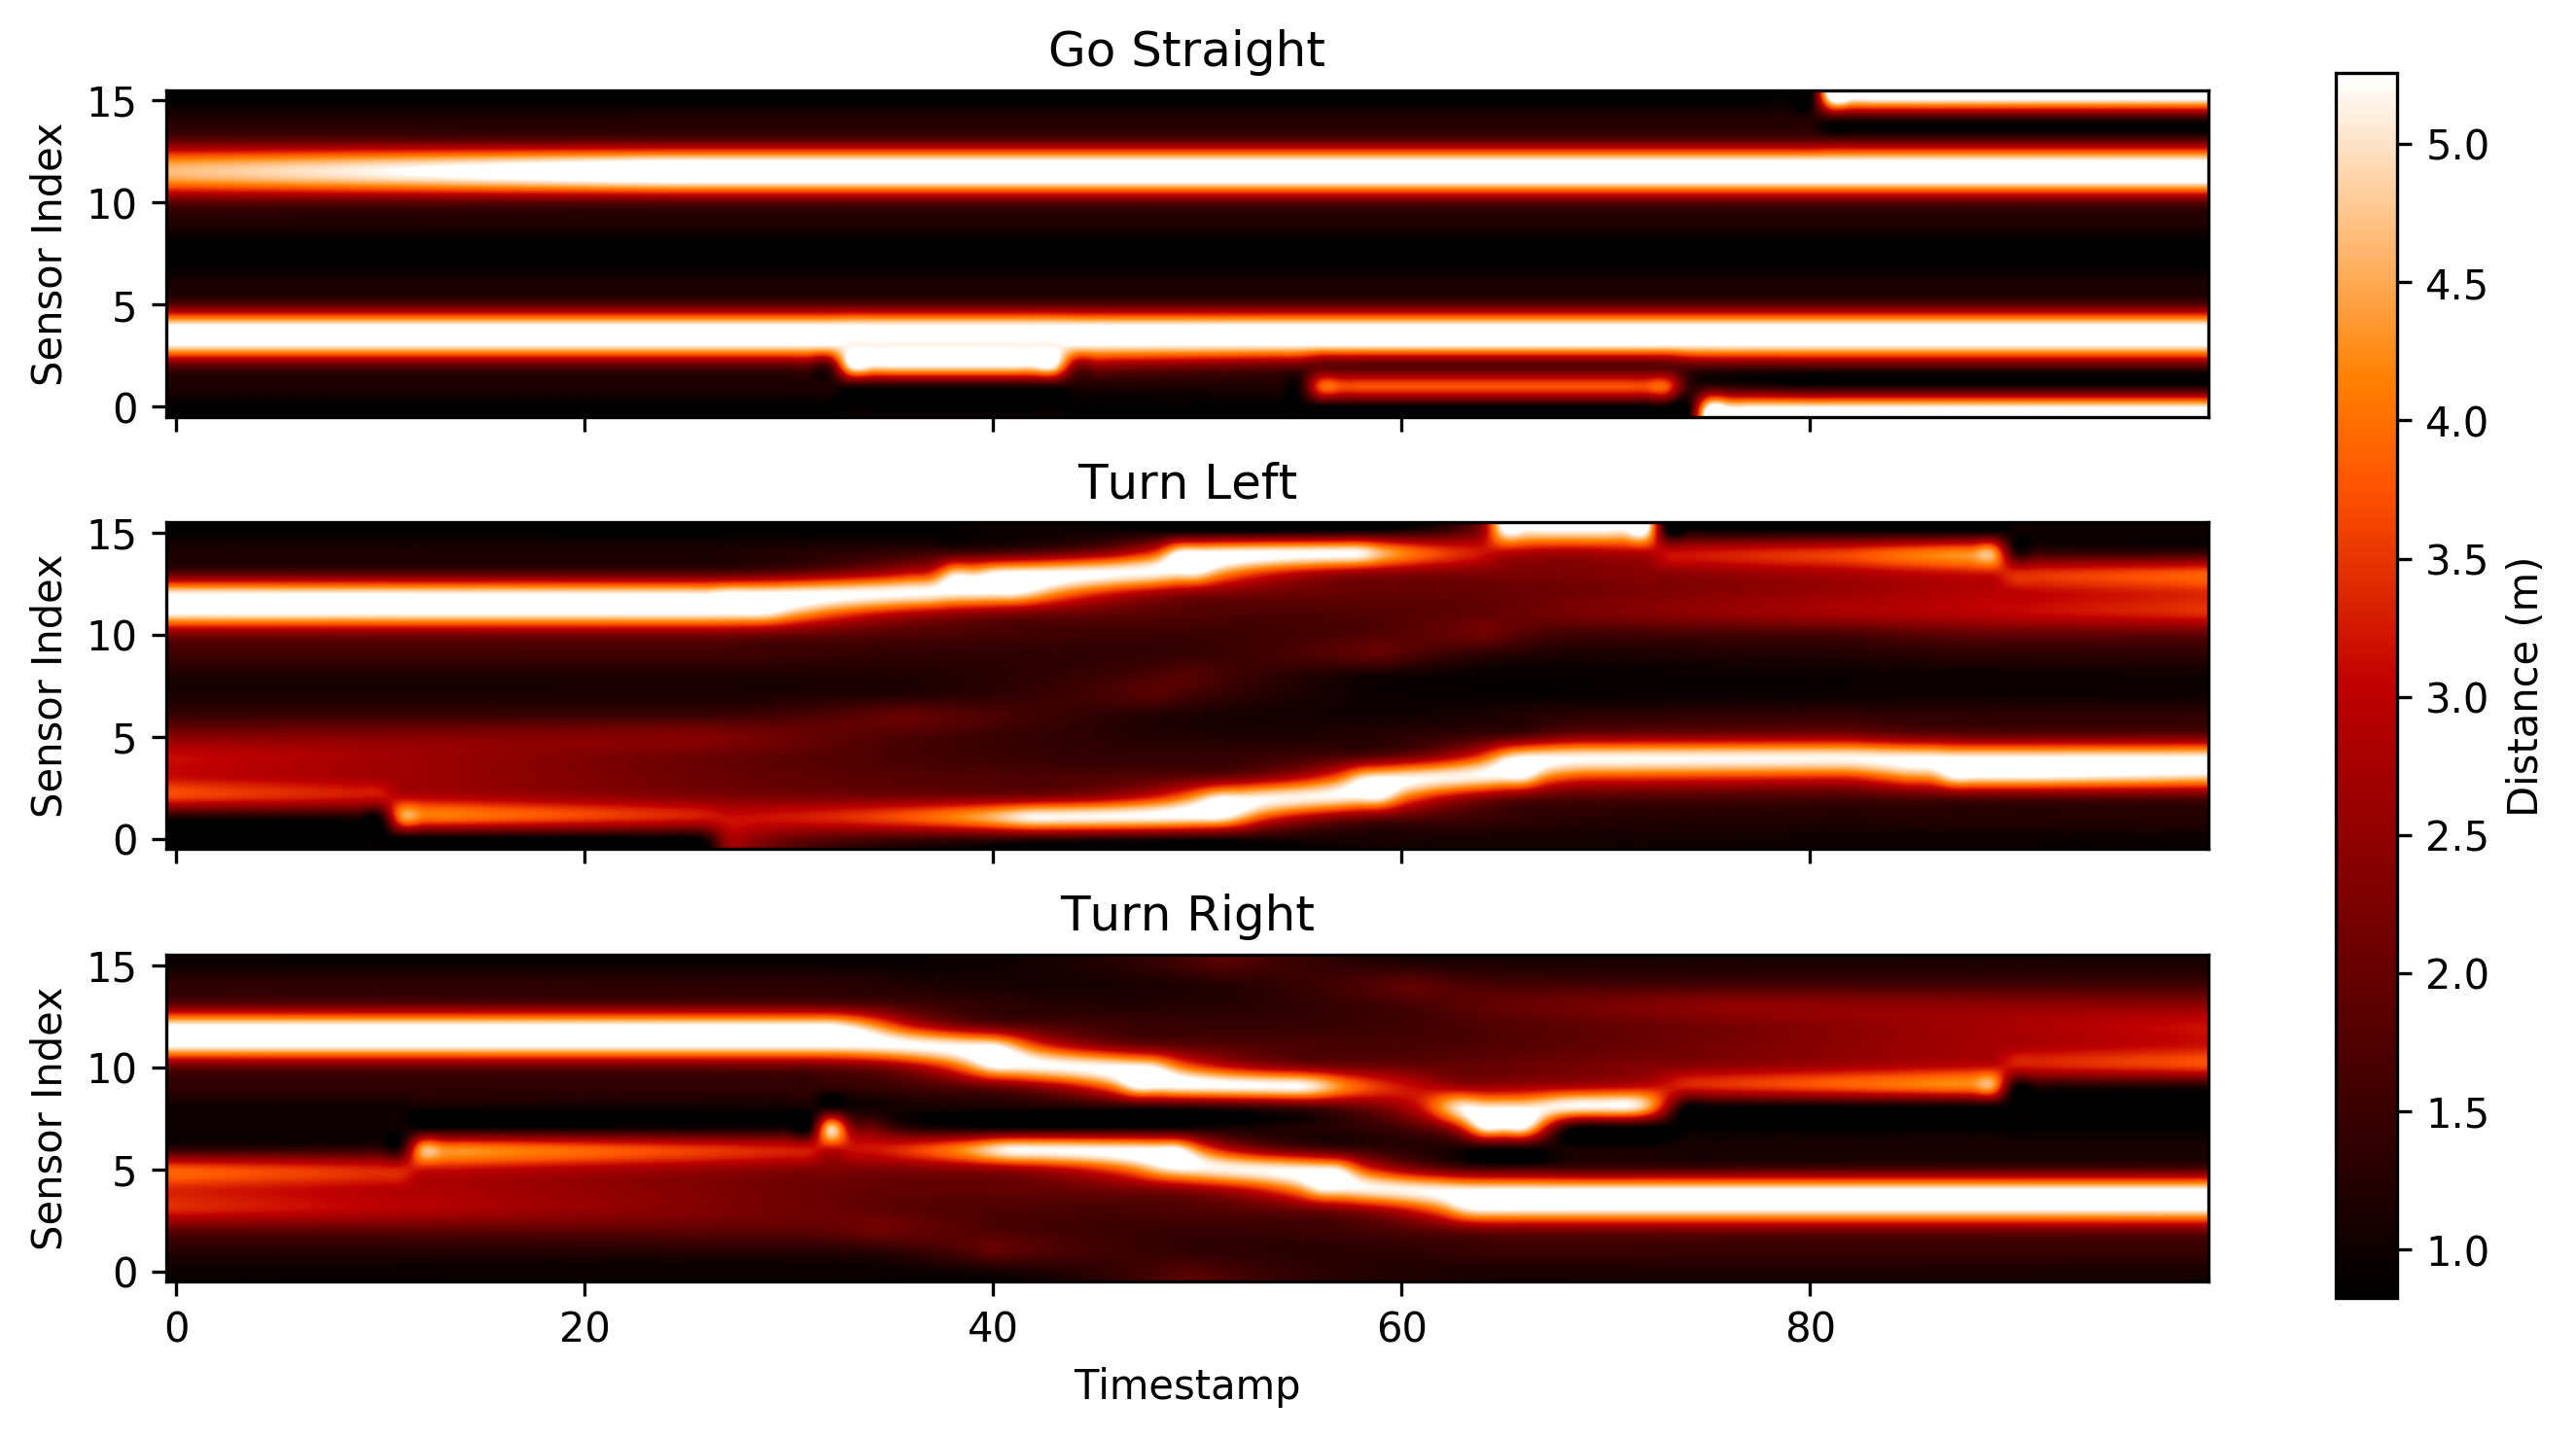

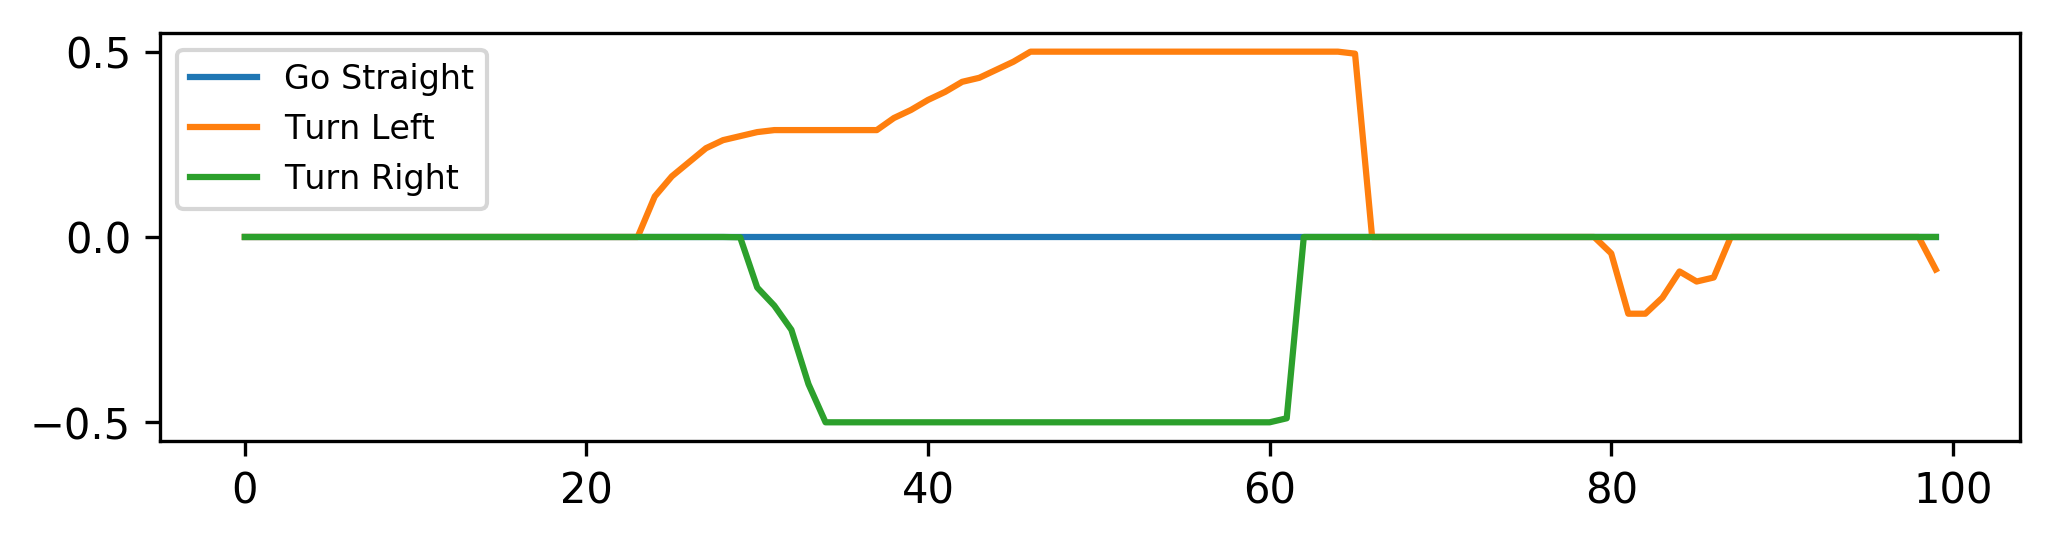

In [9]:
""" 使用imshow 结合cmap参数显示单通道图像
    - 使用 interpolation 参数平滑图像
    - 使用 origin 参数修改图像原点

"""
import matplotlib.pyplot as plt
import numpy as np

straight = np.transpose(np.array(distance[0:100]))
left_turn = np.transpose(np.array(distance[850:950]))
right_turn = np.transpose(np.array(distance[11266:11366]))

w_s = np.array(angular[0:100])
w_l = np.array(angular[850:950])
w_r = np.array(angular[11266:11366])

time = np.arange(0,100,1)

fig1, axes = plt.subplots(3, 1,figsize=(10,7),sharex=True, dpi=300) # w,h
axes[0].imshow(straight,origin='lower',interpolation='spline36', cmap=plt.cm.gist_heat)
axes[0].set_ylabel("Sensor Index")
axes[0].set_title("Go Straight")

axes[1].imshow(left_turn, origin='lower',interpolation='spline36',  cmap=plt.cm.gist_heat)
axes[1].set_ylabel("Sensor Index")
axes[1].set_title("Turn Left")

mappable = axes[2].imshow(right_turn, origin='lower', interpolation='spline36', cmap=plt.cm.gist_heat)
axes[2].set_ylabel("Sensor Index")
axes[2].set_xlabel("Timestamp")
axes[2].set_title("Turn Right")

fig1.subplots_adjust(bottom=0.2, right=1, top=0.8)
cbar = fig1.colorbar(mappable,ax=axes)
#cbar.minorticks_on()
cbar.set_label('Distance (m)')
# 保存
fig1.savefig(fname="2D_visual.png",format="png")

fig2, ax = plt.subplots(figsize=(8,1.8), dpi=300)
ax.plot(time,w_s)
ax.plot(time,w_l)
ax.plot(time,w_r)
#ax.set_xlabel("Timestamp")
#ax.set_ylabel("Angular Velocity (rad/s)")
ax.legend(["Go Straight", "Turn Left", "Turn Right"], loc = 2, prop = {'size':8})
fig2.savefig(fname="2D_angular.png",format="png")


plt.show()

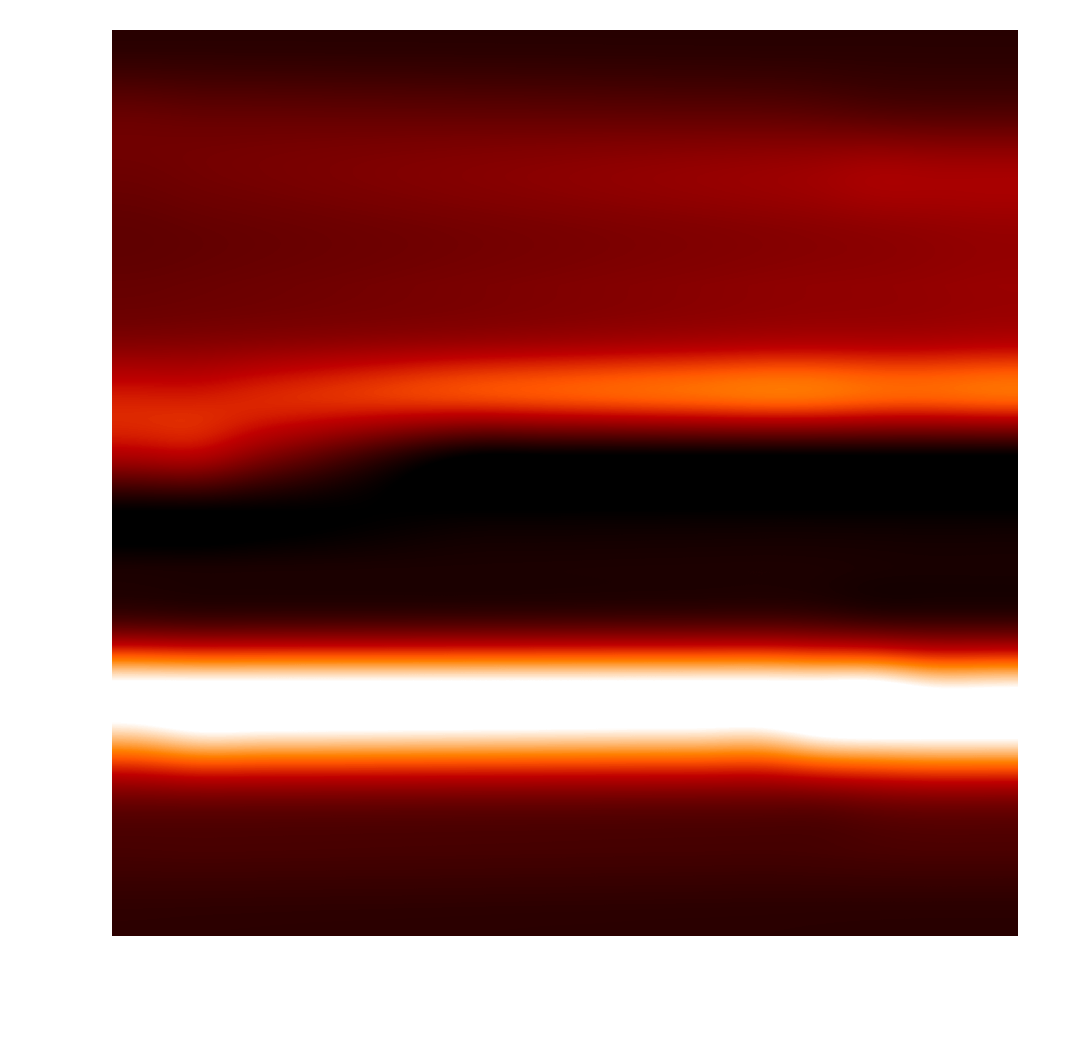

In [10]:
""" 保存连续100帧二维图片，16X16

"""
import matplotlib.pyplot as plt
import numpy as np

plt.figure(dpi=300)
plt.axis('off')
for i in range(100):
    img_array = np.transpose(np.array(distance[11300+i*16:11300+(i+1)*16]))
    plt.imshow(img_array, origin='lower', interpolation='spline36', cmap=plt.cm.gist_heat)
    plt.savefig(fname="./2-D/%d.png"%i,format="png")

## 1.3 3-D Image Visualization
- Stacking three two dimensional as a three dimensional tensor (H,W,C)
- The three channels R, G, and B are sequences 0~16, 16~32, 32~48 respectively.

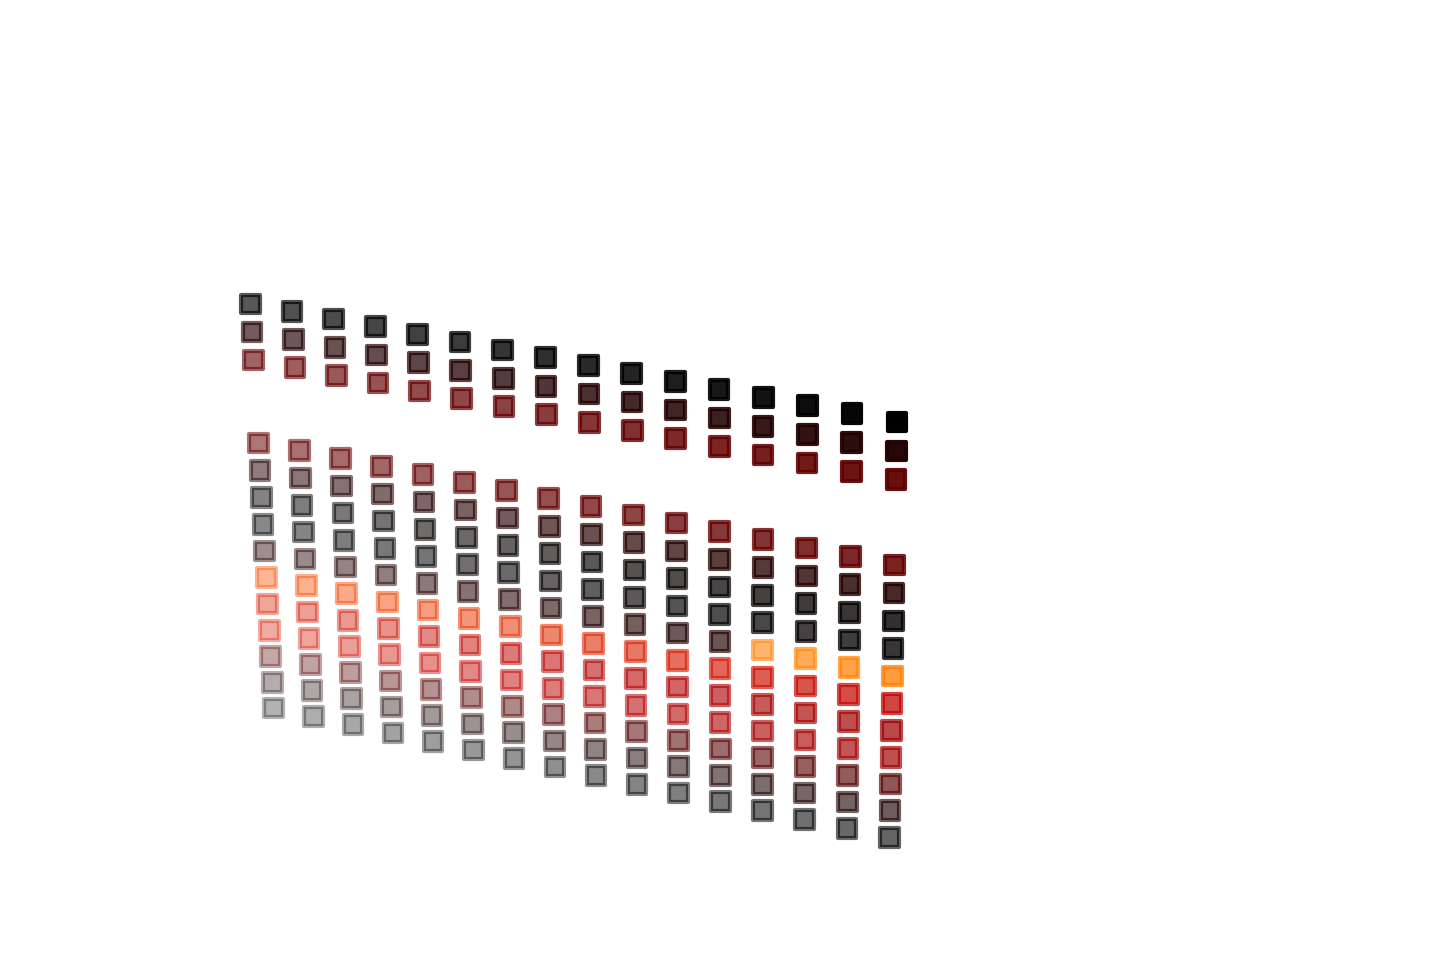

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

""" 证明索引及坐标轴对应正确
    - 显示的x,y,z分别对应st,lt,和sonar index
    与二维图像显示相同

"""

array = np.reshape(np.array(distance[11266:11282]), (16,16,1)) # s-t, d, L-T

#array = np.transpose(right_turn, (0,2,1)) # s-t,L-T,d

x = np.arange(1, 17, 1) # s-t
y = np.arange(0, 1, 1) # l-t 
z = np.arange(1, 17, 1) # d
# here are the x,y and respective z values
X, Y, Z = np.meshgrid(x, y, z)
c = np.reshape(array,(256,))

fig = plt.figure(figsize=(6,4), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ss = ax.scatter(X, Y, Z, c=c, cmap=plt.cm.gist_heat, marker="s")
ax.axis('off')
ax.set_xlim3d(0,16)
ax.set_ylim3d(0,10)
ax.set_zlim3d(0,16)
fig.savefig(fname="3D_visual_zoom.png",format="png")

#fig.colorbar(ss, shrink=0.5, aspect=10)

plt.show()

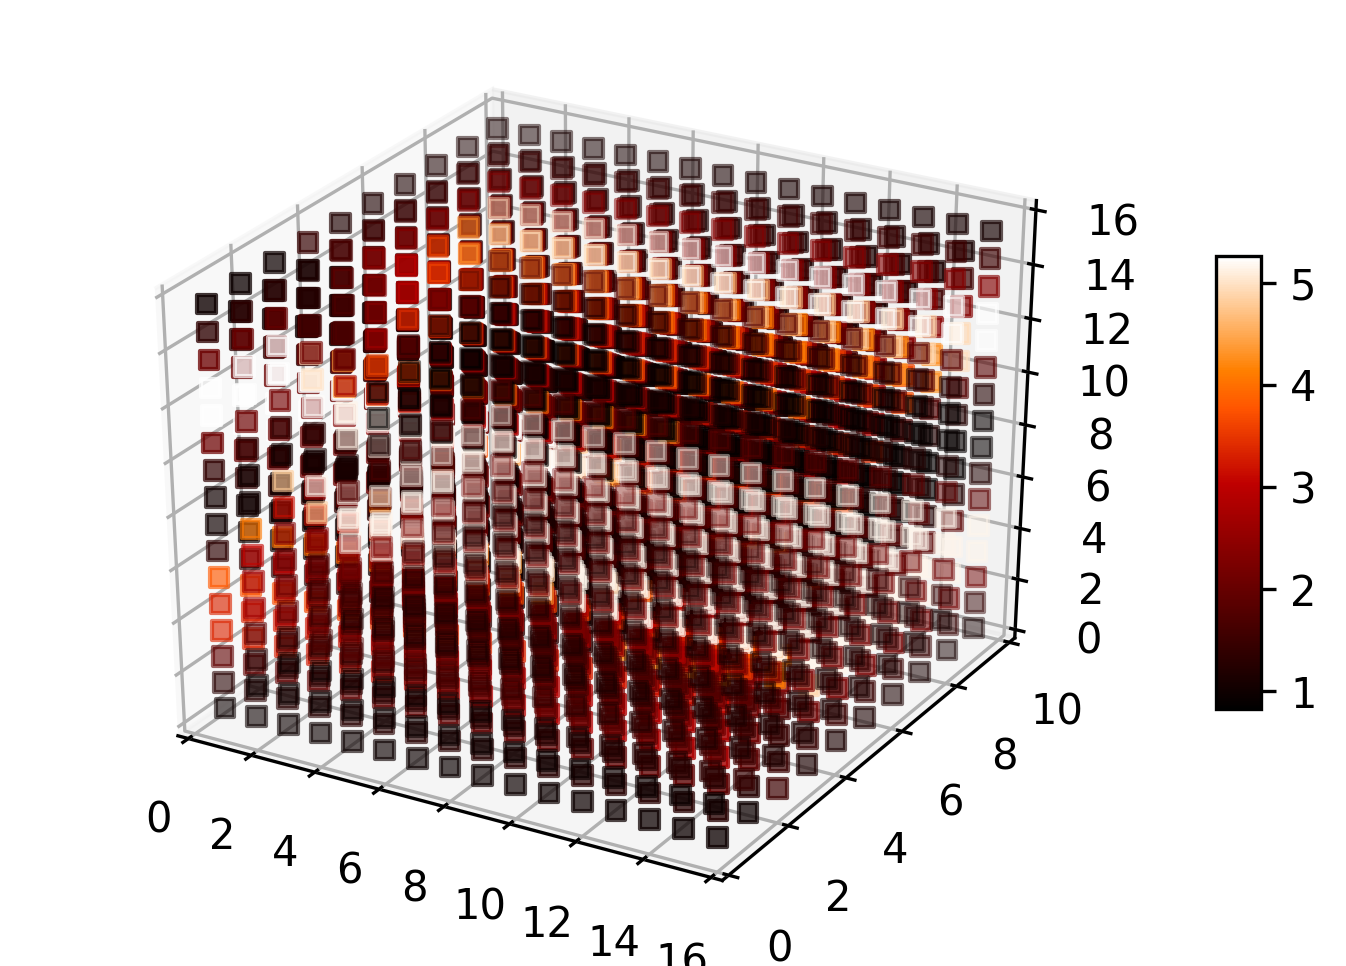

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

""" 
1. 控制坐标轴刻度显示
2. 放大第一层显示

"""

array = np.reshape(np.array(distance[11266:11426]), (16,16,10)) # s-t, d, L-T 原始数据形式

#array = np.transpose(right_turn, (0,2,1)) # S-T,L-T,Sonar index

x = np.arange(1, 17, 1) # 显示图的x 对应tensor的y
y = np.arange(0, 10, 1)# y对应tensor的z
z = np.arange(1, 17, 1)# z对应tensor的x
# tensor是不能变的，不然取出的数对应不上，现在就是直接显示原始的tensor,
# 只不过显示图的坐标轴和tensor定义不同罢了

# here are the x,y and respective z values
X, Y, Z = np.meshgrid(x, y, z)
c = np.reshape(array,(2560,))

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X, Y, Z, c=c, cmap=plt.cm.gist_heat,marker="s")

#ax.w_yaxis.set_major_locator(LinearLocator(5))
#ax.w_zaxis.set_major_locator(LinearLocator(5))

#ax.yticks3d(np.linspace(16, 176, 16, endpoint=True))
ax.set_xlim3d(0,16)
ax.set_ylim3d(0,10)
ax.set_zlim3d(0,16)

#ax.set_xlabel('Short-Term Time Stamp', fontsize=8, fontweight='bold', color='b')

#ax.set_ylabel('Long-Term Time Stamp',fontsize=8, fontweight='bold', color='r')

#tmp_planes = ax.zaxis._PLANES 
#ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
#                     tmp_planes[0], tmp_planes[1], 
#                     tmp_planes[4], tmp_planes[5])
#ax.set_zlabel('Sensor Index',fontsize=14, fontweight='bold', color='g')

cbar = fig.colorbar(sc, shrink=0.5, aspect=10)
#cbar.set_label('Distance (m)')

fig.savefig(fname="3D_visual.png",format="png")

plt.show()

## 1.4 相关矩阵

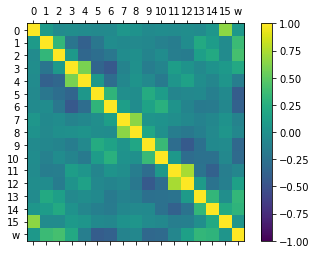

In [85]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

D_corr = np.column_stack((distance,angular))
df = pd.DataFrame(D_corr) # 将numpy数组转为df
correlations = df.corr() # 计算变量之间的相关系数矩阵

# plot correlation matrix
fig, ax = plt.subplots() #调用figure创建一个绘图对象

cax = ax.matshow(correlations, vmin=-1, vmax=1)  #绘制热力图，从-1到1

fig.colorbar(cax)  #将matshow生成热力图设置为颜色渐变条

ticks = np.arange(0,17,1) #生成0-9，步长为1
names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','w']
ax.set_xticks(ticks)  #生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names) #生成x轴标签
ax.set_yticklabels(names)

fig.savefig(fname="correlation",format="svg")
plt.show()

# 2. Data Distribution
- Visualizing the distribution of the angular velocity 

<function matplotlib.pyplot.show(*args, **kw)>

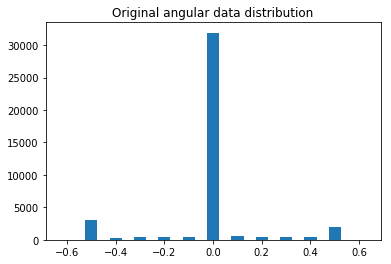

In [7]:
## Plot original data distribution

# main parameter used in np.histogram:
# 1. The data to be count
# 2. The bins list which contains the desired bin value to be counted.
# 3. returned hist and bin_edges are used as the plt.bar parameter
# to plot a distribution histogram
# note that the lenght of bin edges is (length(hist)+1).
import matplotlib.pyplot as plt

# get bins
max_angular = 0.6
min_angular = -0.6

bin_count_angular = 12

bin_interval_angular = (max_angular-min_angular)/bin_count_angular

bins_angular = [min_angular+i*bin_interval_angular for i in range(bin_count_angular+1)]

hist_angular, bin_edges_angular = np.histogram(agl, bins_angular)


plt.figure(1)
plt.bar(bin_edges_angular, np.append(hist_angular, 0), width=0.05)
plt.title("Original angular data distribution")
plt.show

## Notes：

bin_edges_angular = 

hist_angular      =

array((-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4, 0.5,  0.6))

array((   0,    7,    8,   51,   56,   73, 4553,  151,  486,  719,  326, 79))

- np.histogram 在是对一个左闭右开的值区间的统计，因此13个bin值，对应12个区间,并返回12个hist值；
- 但采用plt.bar()默认方式画直方图时，直方图会从最小值开始，在bin值上显示高度，代表此区间数量，如\[0.6,0.5) 0个并在0.6上显示0
- 因此在画第13个bin时，会找不到对应的hist数量，因此我们追加0；
- 因此，bin值左右区间值的选取要超过待统计数据的最值，因为若以最值作为最后一个bin值，则最值不会被统计（不存在对应区间）


In [8]:
hist_angular

array([    0,  2983,   335,   448,   407,   355, 31911,   534,   440,
         384,   452,  2013])

## 07-03 dataset visualization

In [4]:
_, w = data_read(dataset_path + "2019-07-03-1.csv")


Reading ultrasound data from csv file...
Reading is done.
The shape of Distance array is (45422, 16), float64
The shape of angular velocity array is (45422,), float64


<function matplotlib.pyplot.show(*args, **kw)>

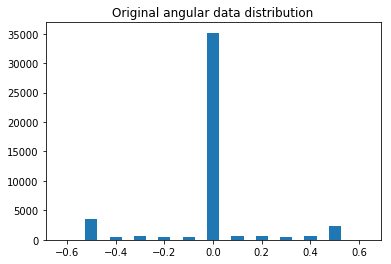

In [6]:
import matplotlib.pyplot as plt

# get bins
max_angular = 0.6
min_angular = -0.6

bin_count_angular = 12

bin_interval_angular = (max_angular-min_angular)/bin_count_angular

bins_angular = [min_angular+i*bin_interval_angular for i in range(bin_count_angular+1)]

hist_angular, bin_edges_angular = np.histogram(w, bins_angular)


plt.figure(1)
plt.bar(bin_edges_angular, np.append(hist_angular, 0), width=0.05)
plt.title("Original angular data distribution")
plt.show

In [8]:
np.mean(w)

-0.005252384774086412

In [9]:
np.var(w)

0.03942260366296889

In [ ]:
# the original depth array (sliced for a graysacle image)
depth_array = D[0:16, :] # (16,16)
print("The first row of original depth array is:\n {}".format(depth_array[0,:]))

# For SciPy, the imsave method will save a two dimension numpy array
# as a gray scale image. The data type converting and normalization
# will be done automatically while saving image.
from scipy.misc import imsave, imread

imsave('depth_gray.jpg', depth_array)

depth_gray = imread('depth_gray.jpg')
print("The height and width of gray image is {}, {}".format(depth_gray.shape, depth_gray.dtype))
print("The first row of gray image is:\n {}".format(depth_gray[0,:]))


# The opencv can also do this by cv2.imwrite and cv2.normalize
# But cv2.imread will reading a gray scale image as a rgb image
# The values in R G B channel are same.

import cv2

norm_depth_array = cv2.normalize(depth_array, None, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite("cv_gray.jpg", norm_depth_array)
cv_gray = cv2.imread("cv_gray.jpg")
print("The image shape and type read by cv2 are {}, {}".format(cv_gray.shape, cv_gray.dtype))
print("The first row is:\n {}".format(cv_gray[0,:,0]))


import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(depth_gray,cmap='gray')
plt.title("Scipy")

plt.subplot(1,2,2)
plt.imshow(cv_gray)
plt.title("OpenCV")

print("The value is:\n{}".format(depth_gray))

In [ ]:
## Creating a gray image dataset
- Spliting the array D into (data_num-length+1) lengthx16 depth array and save each of them as a gray scale image.
- Save the local path of every image and corresponding linear and angular velocity to a new csv file.
- The images and labels saved in csv file can be supplemented at the end of the file.

In [ ]:
import copy
from scipy.misc import imsave
import datetime

def create_gray_dataset(D, vel, agl, length, dataset_path, csv_name):
    # define the height and width of image
    data_num, width = D.shape
    height = length
    images_path = dataset_path + 'Gray_IMG/'
    csv_path = dataset_path + csv_name
    
    # save the image path into a list
    images_csv = []
    # write image to local file
    for i in range(data_num-height+1):
        image_array = copy.deepcopy(D[i:i+height,:])
        image_path = images_path + str(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S_%f")+".jpg")
        imsave(image_path,image_array)
        
        images_csv.append(image_path)
    
    images_number = len(images_csv)
    print("{} gray images have been saved.".format(images_number))
    
    
    ## creat a new dataset 
    # save image path and labels into csv file
    count = 0 
    with open(csv_path, 'a') as f:
        writer = csv.writer(f)
        
        for i in range(images_number):
            img_csv = images_csv[i]
            linear = vel[i+height-1]
            angular = agl[i+height-1]
            
            row = [img_csv,linear, angular]
            
            writer.writerow(row)
            count +=1
    
    print("{} labels have been saved.".format(count)) 
    
gray_dataset_path = "/media/ubuntu16/Documents/datasets/SonarSet/SIM/"
gray_csv_name = "gray_sim.csv"

create_gray_dataset(D, vel, agl, 16, gray_dataset_path, gray_csv_name)


import os
from math import ceil
from scipy.misc import imread
import matplotlib.pyplot as plt

imgs_path = "/media/ubuntu16/Documents/datasets/SonarSet/SIM/Gray_IMG/"

imgs_num = len(os.listdir(imgs_path))

i=1
for img_name in os.listdir(imgs_path):
    img = imread(imgs_path+str(img_name))
    
    plt.subplot(int(ceil(imgs_num/5)), 5, i)
    plt.imshow(img,cmap='gray')
    i+=1